# Lecture 7: More statistics

[Data Visualization · 1-DAV-105](http://bbrejova.github.io/viz/)

Lecture by Broňa Brejová

## Importing libraries and data

As usual, we start by importing libraries. We add [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) library for working with probability distributions. One more library will be added at the end of the lecture.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Markdown

import scipy.stats

In this lecture, we will use the World bank dataset from Lecture 03b (table `countries`) downloaded from WorldBank https://databank.worldbank.org/home under CC BY 4.0 license.

We will also work with an informal survey of preferences and opinions of young people done in 2013 among students of FSEV UK and their friends. The dataset was downloaded from <https://www.kaggle.com/miroslavsabo/young-people-survey>. The columns correspond to survey questions, rows to respondents. The list of questions and the meaning of responses is given in [this document](https://bbrejova.github.io/viz/data/fsev-columns.txt). 

In [2]:
url = 'https://bbrejova.github.io/viz/data/fsev-responses.csv'
fsev = pd.read_csv(url)
display(Markdown("**Size of fsev table:**"), fsev.shape)

**Size of fsev table:**

(1010, 150)

In [3]:
url = 'https://bbrejova.github.io/viz/data/World_bank.csv'
countries = pd.read_csv(url).set_index('Country')
display(countries.describe())

,Population2000,Population2010,Population2020,Area,GDP2000,GDP2010,GDP2020,Expectancy2000,Expectancy2010,Expectancy2020,Fertility2000,Fertility2010,Fertility2020
count,2.170000e+02,2.170000e+02,2.170000e+02,2.160000e+02,199.000000,209.000000,210.000000,211.000000,210.000000,209.000000,211.000000,211.000000,211.000000
mean,2.821267e+07,3.201312e+07,3.592913e+07,6.235930e+05,8292.850729,16135.528397,17547.135072,67.358588,70.580052,72.309699,3.211021,2.890908,2.525145
std,1.157060e+08,1.282292e+08,1.398323e+08,1.828856e+06,13036.320032,24118.156125,26171.548454,9.795515,8.831970,7.482700,1.716951,1.490287,1.273400
min,9.638000e+03,1.024100e+04,1.106900e+04,1.000000e+01,122.961660,222.660583,216.827417,44.518000,45.596000,52.777000,0.912000,1.042000,0.837000
25%,6.049510e+05,7.055170e+05,7.972020e+05,1.122250e+04,654.638840,1706.414917,2262.246896,61.362000,64.480750,66.797000,1.840000,1.765000,1.557500
50%,5.056174e+06,5.768613e+06,6.579900e+06,1.017050e+05,1996.515578,5735.422857,6370.903532,70.417073,72.810500,72.889000,2.660000,2.340000,2.040000
75%,1.639406e+07,2.112004e+07,2.564925e+07,4.786050e+05,10721.262761,21447.858255,22805.261142,74.505000,77.578598,78.041000,4.395000,3.827000,3.257000
max,1.262645e+09,1.337705e+09,1.411100e+09,1.709825e+07,81763.827669,161780.745361,182537.387370,81.370000,83.109000,85.497561,7.732000,7.485000,6.892000


In [4]:
display(Markdown("**Values of life expectancy in 2020 in individual countries:**"))
display(countries['Expectancy2020'].dropna())

**Values of life expectancy in 2020 in individual countries:**

Country
Afghanistan            62.575000
Albania                76.989000
Algeria                74.453000
Angola                 62.261000
Antigua and Barbuda    78.841000
                         ...    
Virgin Islands         79.819512
West Bank and Gaza     74.403000
Yemen                  64.650000
Zambia                 62.380000
Zimbabwe               61.124000
Name: Expectancy2020, Length: 209, dtype: float64

## Histograms

Histograms are well known, and we have seen them in Lecture 03. We split the range of a variable into equally sized bins, count the number of data points in each bin and plot the counts as a bar graph.

Histograms allow us to observe many aspects of the distribution of values of a variable:

* range of values, outliers
* central tendency
* unimodality / multimodality
* variance
* symmetry / skewness (šikmosť)

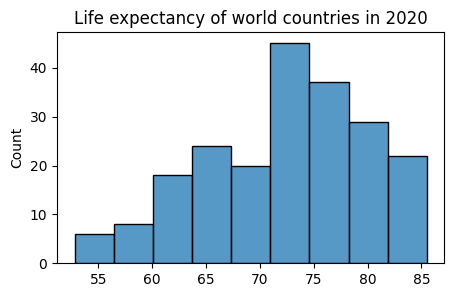

In [5]:
axes = sns.histplot(data=countries, x='Expectancy2020')
axes.set_title('Life expectancy of world countries in 2020')
axes.set_xlabel(None)
axes.figure.set_size_inches(5, 3)
pass

### Custom bins

* Seaborn library makes bins by splitting the range into equally sized intervals, but perhaps a more meaningfull plot uses round values at bin boundaries, e.g. intervals of 5 years 50-55, 55-60, 60-65,... 
* We can use manually created bin boundaries in Seaborn. 
* Plotly library tries to create more meaningful bins by default.

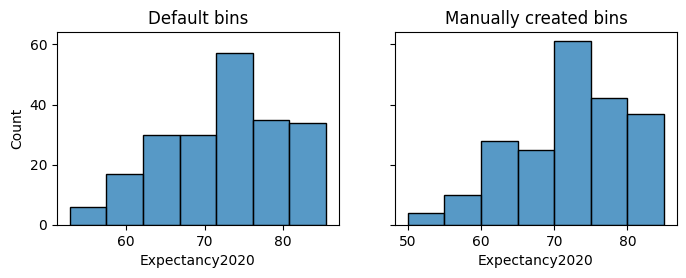

In [6]:
# create a figure with two plots
figure, axes = plt.subplots(1, 2, figsize=(8,2.5), sharey=True)

# the first plot has histogram with default bins of width 5
sns.histplot(data=countries, x='Expectancy2020', binwidth=5, ax=axes[0])
axes[0].set_title('Default bins')

# the second plot has manually set bin boundaries 50,55,60,...,85
sns.histplot(data=countries, x='Expectancy2020', 
             bins=range(50, 90, 5), ax=axes[1])
axes[1].set_title('Manually created bins')
pass

In [ ]:
# In Plotly, we specify the maximum number of bins. 
# The library may choose a lower number to get "nice" bin boundaries
fig = px.histogram(countries, x="Expectancy2020", 
                   nbins=8, width=500, height=350)
fig.show()

### Use equally-sized bins

* Manually created bin boundaries can be arbitrary, but if bin width is unequal, the resulting plot is confusing.
* If you really need special bins (e.g. age <18 years, 18-65 years, >65 years), make a categorical variable, then plot it as a bar graph (typically displayed as bars with equal width, spaces between bars), clearly mark the meaning of each bar.

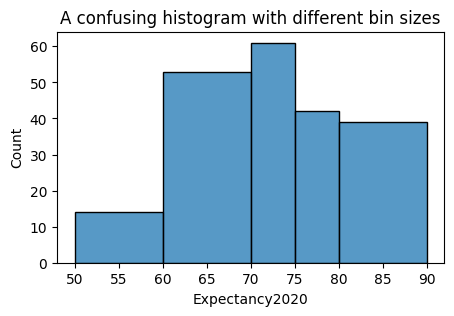

In [45]:
axes = sns.histplot(data=countries, x='Expectancy2020', 
                    bins=[50, 60, 70, 75, 80, 90])
axes.set_title('A confusing histogram with different bin sizes')
axes.figure.set_size_inches(5, 3)
pass

### Removing outliers

* Histograms are great for spotting outliers.
* But extreme values reduce the space given to more regular values, so perhaps we want to remove them in subsequent analysis.

We have several options:

* Remove them from the dataset if we believe them to be errors.
* Or remove them from the plot only, e.g. by `set_xlim` or by using custom bins with a smaller range.
* Or clip values: replace values above some threshold with the threshold value (function [`clip`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.clip.html) in Pandas). Thus they will be present in the last bin. This bin should be then clearly marked.

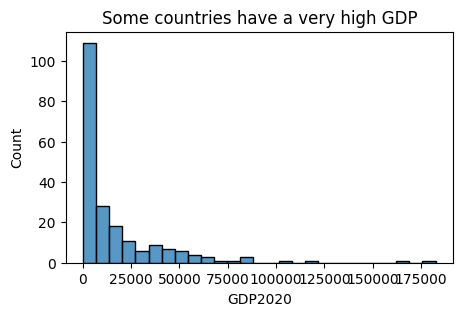

In [9]:
axes = sns.histplot(data=countries, x='GDP2020')
axes.set_title('Some countries have a very high GDP')
axes.figure.set_size_inches(5, 3)
pass

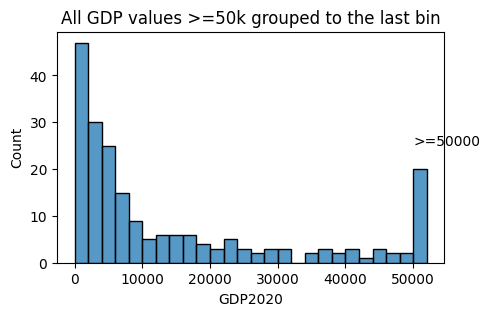

In [10]:
# replace values larger than 51k with 51k
gdp_clipped = countries['GDP2020'].clip(0, 51000)
# make histogram with manual bins, with last bin 50k-52k
axes = sns.histplot(x=gdp_clipped, bins=np.arange(0, 53000, 2000))
axes.figure.set_size_inches(5, 3)
# mention clipping in plot title
axes.set_title('All GDP values >=50k grouped to the last bin')
# also add a text label to the bin with clipped values
axes.text(x=50000, y=25, s='>=50000')
pass

### Problems with precision

When working with integers or even real numbers given with a small number of decimal points, we can get artifacts related to different counts of possible values falling to different bins. 

To illustrate this, we uniformly sample million points from the set $\{0, 0.01, 0.02, \dots, 0.99\}$.

* There will be a similar number of samples for each possible value from this set.
* We show histograms with 10, 7 and 77 equally sized bins. 
* For 10 bins, each bin summarizes 10 of the possible values and the sizes are approximately the same.
* For 7 bins, the first and the last bin summarize 15 possible values each and remaining bins summarize 14 possible values each. The first and last bin are thus slightly higher.
* For 77 bins, some bins summarize 2 different values, others only 1. We see clear differences in bar height.

If we are unaware of this, we may draw incorrect conclusions from the second and third plot.

**Example of data (first values):**

array([0.61, 0.96, 0.73, 0.95, 0.06])

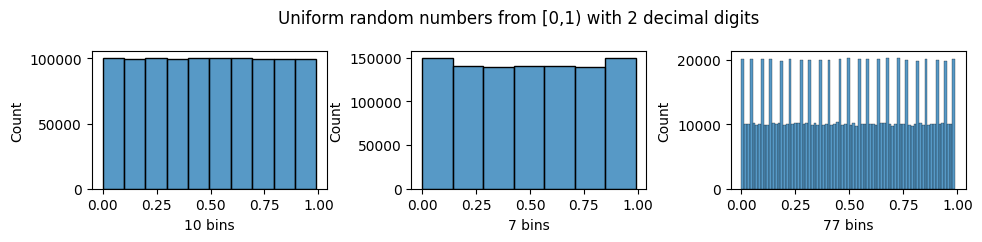

In [11]:
sample_uniform = np.random.randint(0, 100, 1000000) / 100
display(Markdown('**Example of data (first values):**'), sample_uniform[0:5])
figure, axes = plt.subplots(1, 3, figsize=(10,2.5))
figure.tight_layout(pad=3)
for (i, bin) in enumerate([10, 7, 77]):
  sns.histplot(x=sample_uniform, bins=bin, ax=axes[i])
  axes[i].set_xlabel(f"{bin} bins")
figure.suptitle("Uniform random numbers from [0,1) with 2 decimal digits")
pass

### Small samples

Beware drawing strong conclusions from small samples. 

* Below we again first show the histogram of life expectancy over all countries.
* Then we show histograms of four random subsets of 20 countries each. 
* Any estimates (including histograms) from small samples are subject to random noise.

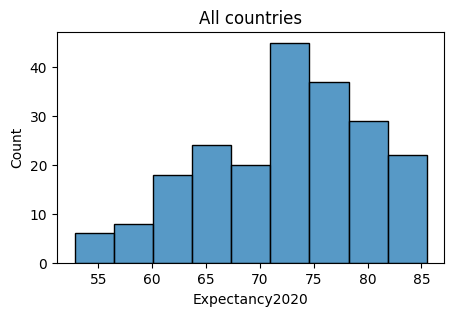

In [12]:
axes = sns.histplot(data=countries, x='Expectancy2020')
axes.set_title('All countries')
axes.figure.set_size_inches(5, 3)
pass

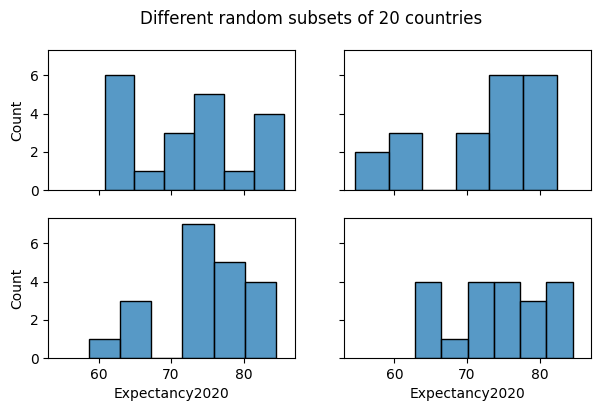

In [13]:
figure, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(7,4))
for row in axes:
  for subplot in row:
    expectancy_sample = countries['Expectancy2020'].dropna().sample(20)
    sns.histplot(x=expectancy_sample, ax=subplot)
figure.suptitle("Different random subsets of 20 countries")
pass

### Summary: Histogram bin size

To summarize, the tricky part of using histograms is to choose the bin size or the number of bins.

Smaller bins mean more details are visible, but some of those details may be artefacts:

* random fluctuations due to small number of points in the bin, or
* effects related to insufficient resolution of the data.

Thus choose bin size based on:

* the amount of data,
* the precision of input values,
* the meaningful resulution of the results.

In the example below we show the life expectancy data with different number of bins. Do 50 or 500 bins show more meaningful information than 10 bins?

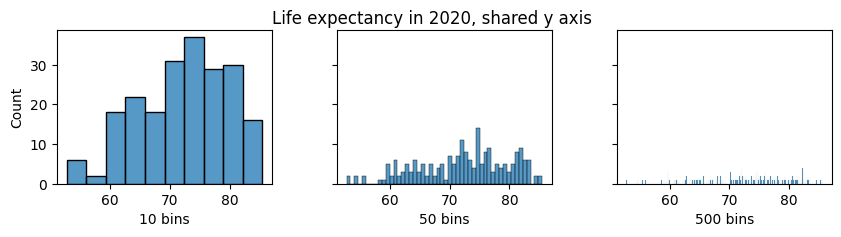

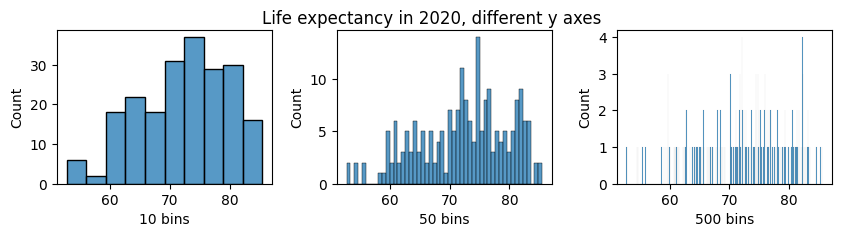

In [14]:
# one set of plots has share y axis, one has not
figure1, axes1 = plt.subplots(1, 3, figsize=(10,2), sharey=True)
figure2, axes2 = plt.subplots(1, 3, figsize=(10,2))
# plot the same plots for each set
for (figure, axes, title) in [(figure1, axes1, 'shared y axis'), 
                              (figure2, axes2, 'different y axes')]:
  # iterate over different numbers of bins
  for (i, bin) in enumerate([10, 50, 500]):    
    sns.histplot(data=countries, x='Expectancy2020', bins=bin, ax=axes[i])
    axes[i].set_xlabel(f"{bin} bins")
  # title of the whole figure
  figure.suptitle(f"Life expectancy in 2020, {title}")
  figure.subplots_adjust(wspace=0.3)  
pass

### Comparing distributions with histograms

* We can compare distributions of a numerical variable split into groups by a categorical variable.
* For example in our `countries` table, we can compare life expectancy in different regions of the world.
* Seaborn provides [several options](https://seaborn.pydata.org/tutorial/distributions.html) for doing so.

The first two plots use semi-transparent overlapping histograms, which work well for two regions (left), but are a mess for many regions (right).

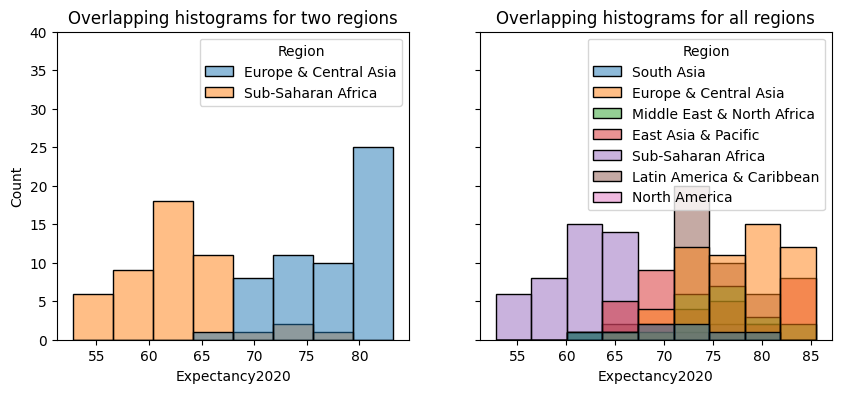

In [15]:
# select two regions
countries_subset = countries.query('Region == "Europe & Central Asia" '
                                   + 'or Region == "Sub-Saharan Africa"')
# create figure with 2 plots
figures, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)
# plot both histograms
sns.histplot(data=countries_subset, x='Expectancy2020', hue='Region', ax = axes[0])
sns.histplot(data=countries, x='Expectancy2020', hue='Region', ax=axes[1])
# make bigger y-axis to accomodate legend
axes[0].set_ylim(0,40)
# titles
axes[0].set_title('Overlapping histograms for two regions')
axes[1].set_title('Overlapping histograms for all regions')
pass

The next two plots attempt to improve the situation.

* On the left we omit bar outlines to simplify the plot.
* On the right we use stacked bars, showing contribution of each region to the whole.

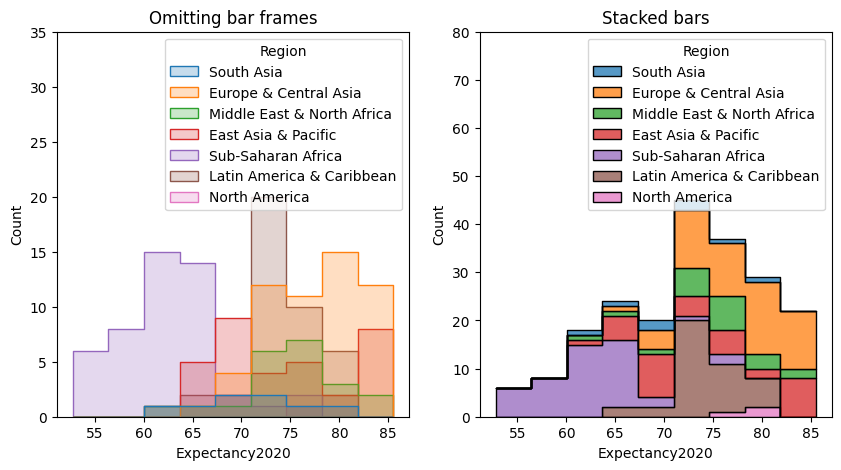

In [16]:
# create figure with 2 plots
figures, axes = plt.subplots(1, 2, figsize=(10, 5))
# plot both histograms
sns.histplot(data=countries, x='Expectancy2020', hue='Region', 
             element='step', ax = axes[0])
sns.histplot(data=countries, x='Expectancy2020', hue='Region', element='step', 
             multiple="stack", ax=axes[1])
# make bigger y-axis to accomodate legend
axes[0].set_ylim(0,35)
axes[1].set_ylim(0,80)
# titles
axes[0].set_title('Omitting bar frames')
axes[1].set_title('Stacked bars')
pass

* Regions contain different number of countries.
* To better compare distribution of the expectancy within region, we should normalize the count to probabilities. 
* Use `common_norm=False` to normalize each region separately.

**Countries in regions:**

Region
North America                  3
South Asia                     8
Middle East & North Africa    21
East Asia & Pacific           37
Latin America & Caribbean     42
Sub-Saharan Africa            48
Europe & Central Asia         58
dtype: int64

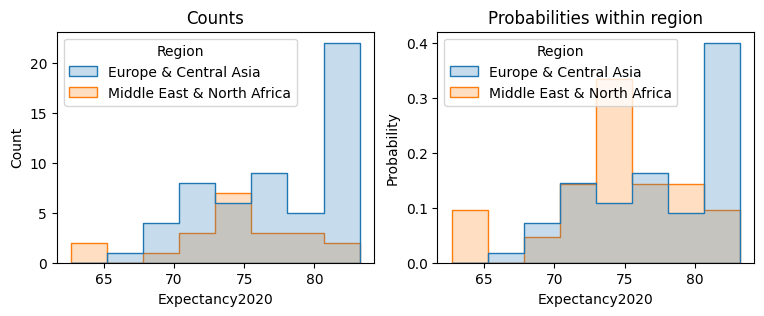

In [17]:
display(Markdown("**Countries in regions:**"))
display(countries.groupby('Region').size().sort_values())

# select two regions of very different sizes
countries_subset2 = countries.query('Region == "Europe & Central Asia" '
                                     + 'or Region == "Middle East & North Africa"')
# plot counts and probabilities
figure, axes = plt.subplots(1, 2, figsize=(9,3))
sns.histplot(data=countries_subset2, x='Expectancy2020', hue='Region', element='step', ax=axes[0])
sns.histplot(data=countries_subset2, x='Expectancy2020', hue='Region', element='step', 
             stat="probability", common_norm=False, ax=axes[1])
axes[0].set_title('Counts')
axes[1].set_title('Probabilities within region')
pass

* Using FSEV survey, we can compare self-reported heights of women and men. 
* We will use only values of adults above 18 years of age.
* Besides the expected trend, we also see a clear outlier, perhaps an error (although people of such heights exist, the cases are extremely rare).
* We will replace it with NaN.

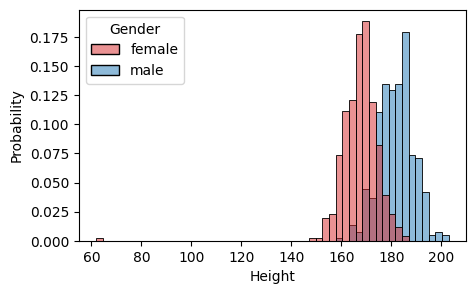

In [18]:
fsev.iloc[:,144].value_counts()
adults = fsev.query("Age >= 18").copy(deep=True)   
axes = sns.histplot(data=adults, x='Height', hue='Gender', 
                    hue_order=['female', 'male'], palette=['C3', 'C0'],
                    stat="probability", common_norm=False)
axes.figure.set_size_inches(5, 3)
pass

Below we see histograms after removal of the extreme value.

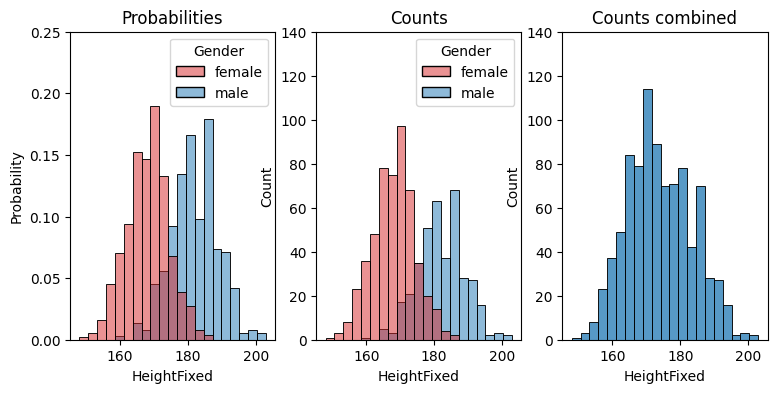

In [19]:
# replace all values lower than 100cm by NaN, in a new column HeighFixed
adults['HeightFixed']=adults['Height'].mask(adults['Height']<100, np.nan)
figure, axes = plt.subplots(1, 3, figsize=(9,4))
sns.histplot(data = adults, x='HeightFixed', hue='Gender', 
             hue_order=['female', 'male'], palette=['C3', 'C0'],
             stat="probability", common_norm=False, ax=axes[0])
sns.histplot(data = adults, x='HeightFixed', hue='Gender', 
             hue_order=['female', 'male'], palette=['C3', 'C0'],
             ax=axes[1])
sns.histplot(data = adults, x='HeightFixed', ax=axes[2])
axes[0].set_ylim(0,0.25)
axes[1].set_ylim(0,140)
axes[2].set_ylim(0,140)
axes[0].set_title('Probabilities')
axes[1].set_title('Counts')
axes[2].set_title('Counts combined')
pass

## Probability distributions

* For a continuous variable, we can imagine having infinitely many data points and making histogram with infinitely small bins, keeping the area under the histogram equal to one.
* Thus we obtain **probability density function** (PDF) (hustota rozdelenia pravdepodobnosti).
* We often assume that our data are a small sample from one of the well-characterized probability distributions (rozdelenie pravdepodobnosti).



### Normal (Gaussian) distribution


* The normal (or Gaussian) distribution has two parameters: mean $\mu$ and standard deviation $\sigma$.
* Its density is
$f(x) = \frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$.
* This is the well-known bell shape.
* Below we plot both histogram of a million samples from this distribution and the density given by the function above.
* These two plots are very similar.

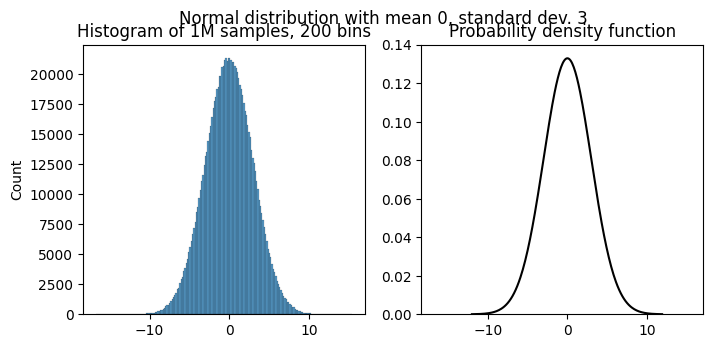

In [20]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(8, 3.5))

# sample million points from the normal distrib. with mean 0 and std. dev. 3
sample_normal = np.random.normal(0, 3, 1000000)
# create histogram of the sampled points
sns.histplot(x=sample_normal, bins=200, ax=axes[0])
axes[0].set_title('Histogram of 1M samples, 200 bins')

# create an object representing normal distrib. with mean 0 and std. dev. 3
normal = scipy.stats.norm(0, 3)
# create equally-spaced points
x = np.arange(-12, 12, 0.1)
# compute values of pdf in these points
y = normal.pdf(x)
# plot the function
axes[1].plot(x, y, 'k-')
axes[1].set_title('Probability density function')
axes[1].set_ylim(0, 0.14)

figure.suptitle("Normal distribution with mean 0, standard dev. 3")
pass

* Normal distribution often arises in situations where a variable is a result of many small influences.
* One example is the height of a person within one gender and population.
* Below we fit the normal distribution to the histogram of the adult male heights from the FSEV survey.


**Mean male height:**

np.float64(181.91820580474933)

**Std. dev. male height:**

np.float64(6.957251247475206)

**Best fit:**

(np.float64(181.91820580474933), np.float64(6.948066753375318))

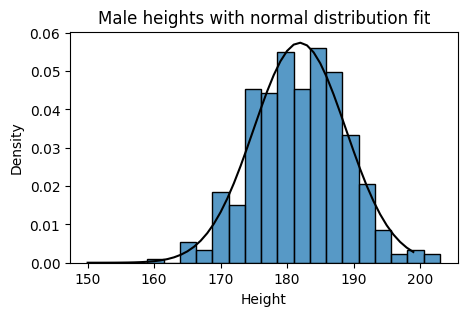

In [21]:
# select male height, drop missing values
male_heights = adults.query("Gender=='male'")['Height'].dropna()
# compute the characteristics (means, stdev)
display(Markdown("**Mean male height:**"),
        male_heights.mean(),             
        Markdown("**Std. dev. male height:**"),
        male_heights.std())

# compute the best fit 
parameters = scipy.stats.norm.fit(male_heights)
display(Markdown("**Best fit:**"), parameters)

# get function values for regularly distributed x values
x = np.arange(150, 200, 1)
pdf_fitted = scipy.stats.norm.pdf(x, loc=parameters[0], scale=parameters[1])

# plot histogram, normalized as density (area=1)
figure, axes = plt.subplots(figsize=(5,3))
sns.histplot(x=male_heights, stat='density', ax=axes)
# add a line for fitted density 
axes.plot(x, pdf_fitted, 'k-')
axes.set_title('Male heights with normal distribution fit')
pass

## Kernel Density Estimation (KDE)

* KDE creates a smoothed version of a histogram.
* We choose a kernel function. e.g. the normal distribution.
* For each point in the dataset, the method creates a "kernel" centered at that point.
* It then adds up the heights of all kernel copies.
* The amount of smoothing is controled by the bandwidth parameter (standard deviation for the normal distribution).
* More information is in [the scikit-learn documentation](https://scikit-learn.org/stable/modules/density.html).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Comparison_of_1D_histogram_and_KDE.png/640px-Comparison_of_1D_histogram_and_KDE.png
">

<small>https://commons.wikimedia.org/wiki/File:Comparison_of_1D_histogram_and_KDE.png Drleft at English Wikipedia, CC BY-SA 3.0</small> 



* KDE can be conveniently computed directly [in Seaborn's displot/kdeplot function](https://seaborn.pydata.org/tutorial/distributions.html).
* The bandwidth is adjusted by `bw_adjust`, with default 1.
* A small bandwidth leads to a bumpy plot not representing real trends.
* A large badwidth can obscure real trends.


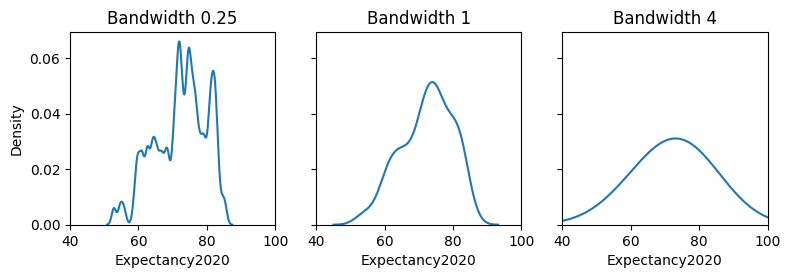

In [22]:
figure, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(9,2.5))
for axes, bandwidth in [(axes[0], 0.25), (axes[1], 1), (axes[2], 4)]:
  sns.kdeplot(x=countries["Expectancy2020"], ax=axes, bw_adjust=bandwidth)
  axes.set_title(f'Bandwidth {bandwidth}')
  axes.set_xlim(40,100)  
pass

We can display combined histogram and KDE.

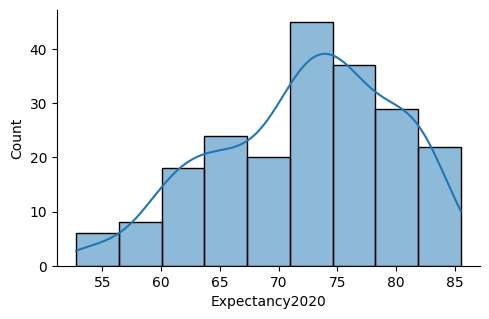

In [23]:
axes = sns.displot(countries, x="Expectancy2020", kde=True)
axes.figure.set_size_inches(5, 3)
pass


KDE plots can be also better for comparing multiple distributions, as their smooth curves are easier to follow than histograms.

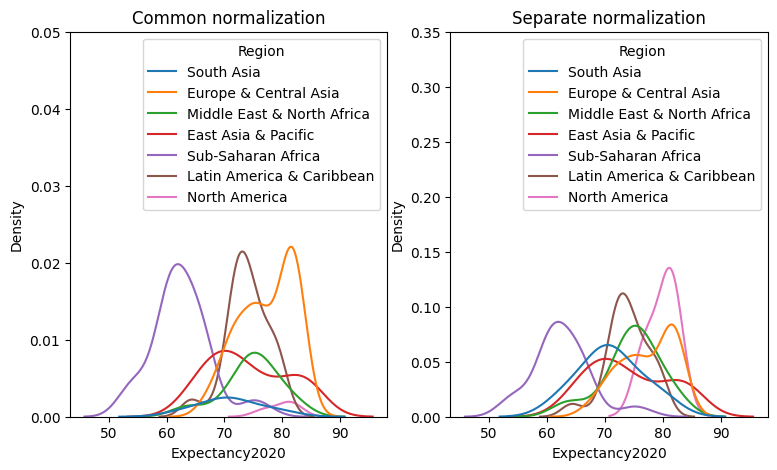

In [24]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(9,5))
sns.kdeplot(x=countries["Expectancy2020"], hue=countries["Region"], ax=axes[0])
axes[0].set_ylim(0, 0.05)
axes[0].set_title('Common normalization')
sns.kdeplot(x=countries["Expectancy2020"], hue=countries["Region"], 
            common_norm=False, ax=axes[1])
axes[1].set_title('Separate normalization')
axes[1].set_ylim(0, 0.35)
pass

## Violin plots

* [Violin plots](https://seaborn.pydata.org/generated/seaborn.violinplot.html) are often used instead of boxplots to compare distributions for different values of a categorical variable.
* Each violin consist of two symmetric KDE plots.
* They can be accompanied by a boxplot or strip plot.
* More variants can be found in the [Seaborn tutorial](https://seaborn.pydata.org/tutorial/categorical.html).


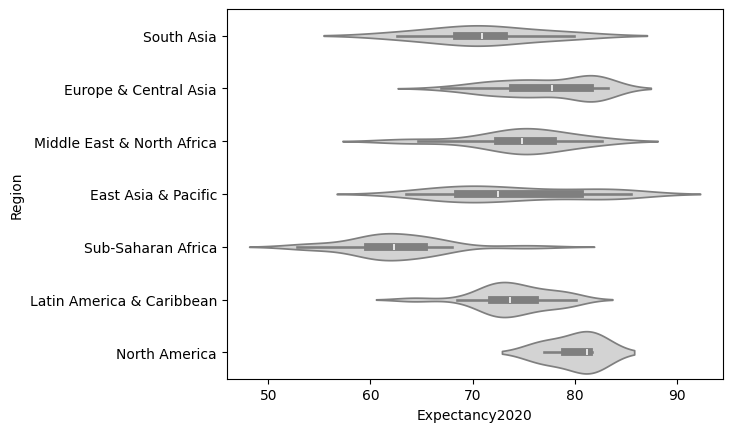

In [25]:
sns.violinplot(data=countries, y="Region", x="Expectancy2020", color="lightgrey")
pass

## Cumulative distribution function

For a probability density function $f(x)$:

* Its cumulative distribution function (CDF) (distribučná funkcia) is the area under the curve from left up to point $x$.
* $F(x) = \int_{-\infty}^x f(t)\,dt$.
* CDF is non-decreasing.
* $\lim_{x\to -\infty}F(x)=0$ and $\lim_{x\to \infty}F(x)=1$.
* $F(x)$ is the probability that the random point from the distribution is $\le x$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Normal_Distribution_CDF.svg/640px-Normal_Distribution_CDF.svg.png">

<small>https://commons.wikimedia.org/wiki/File:Normal_Distribution_CDF.svg
Inductiveload, Public domain</small> 




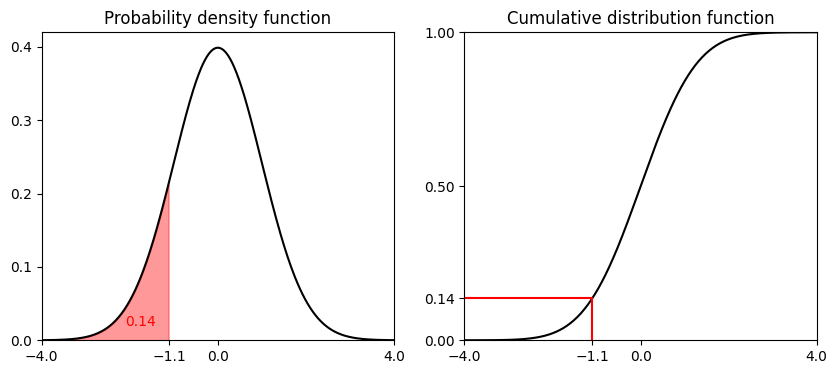

In [70]:
(figure, axes) = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

normal = scipy.stats.norm(0, 1)
# create equally-spaced points
width = 4
x = np.arange(-width, width, 0.02)
chosen_x = -1.1
x2 = np.arange(-width, chosen_x, 0.02)
# compute values of pdf in these points
y_density = normal.pdf(x)
y_cdf = normal.cdf(x)
chosen_y = normal.cdf(chosen_x)
# plot the function
axes[0].plot(x, y_density, 'k-')
axes[0].fill_between(x2, y_density[0:len(x2)], 0, alpha=0.4, color='red')
axes[0].text(x=chosen_x-1, y=0.02, s=f'{chosen_y:.2f}', color='red')
axes[0].set_title('Probability density function')
axes[0].set_ylim(0, 0.42)
axes[0].set_xlim(-width, width)
axes[0].set_xticks([-4, chosen_x, 0, 4])
axes[0].set_yticks([0, 0.1, 0.2, 0.3, 0.4])
axes[1].plot(x, y_cdf, 'k-')
axes[1].plot([chosen_x, chosen_x, -width], [0, chosen_y, chosen_y], 'r-')
axes[1].set_title('Cumulative distribution function')
axes[1].set_ylim(0, 1)
axes[1].set_yticks([0, chosen_y, 0.5, 1])
axes[1].yaxis.set_major_formatter('{x:.2f}')
pass

### Empirical cumulative distribution function (ECDF)

* This is a similar concept for a finite sample.
* For each $x$, $F(x)$ is the fraction of the sample which is $\le x$.
* This gives us a step-wise function which can be visualized.
* Unlike histograms and KDE, no parameters need to be set (bins, bandwidth).
* Allows comparison of multiple distributions and their quantiles (how?).
* But harder to interpret than histogram in terms of shape.

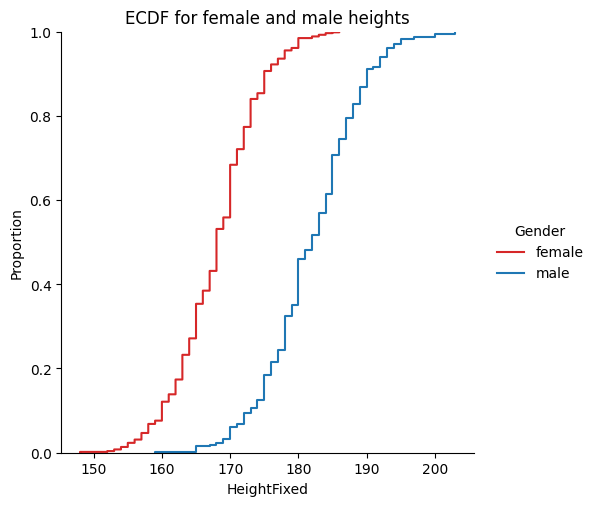

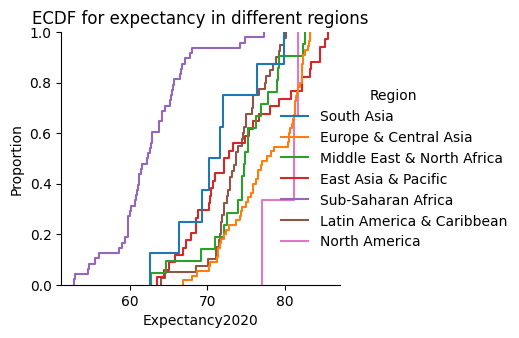

In [26]:
grid = sns.displot(adults, x="HeightFixed", hue="Gender", kind="ecdf",
                   hue_order=['female', 'male'], palette=['C3', 'C0'])
grid.axes[0,0].set_title('ECDF for female and male heights')
grid = sns.displot(countries, x="Expectancy2020", hue="Region", kind="ecdf")
grid.axes[0,0].set_title('ECDF for expectancy in different regions')
grid.figure.set_size_inches(5, 3)
pass

## Two-dimensional histograms / KDE

* Instead of scatterplots, we can compute 2D histograms shown as a heatmap or smooth them by KDE.
* This works well if we have many overlapping points.
* Below we show several variants for the plot height vs. weight of adults in the FSEV survey (with the height outlier removed).
* In scatterplot there is a cloud of overlapping points and it is not clear which parts of it are denser. This can be somewhat improved with smaller points and transparency.

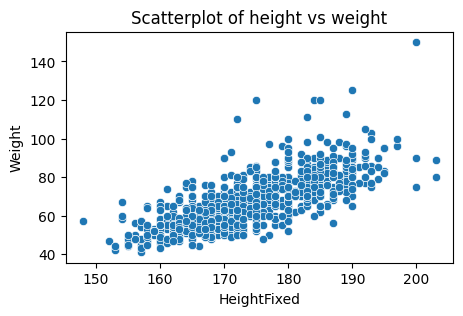

In [27]:
axes = sns.scatterplot(data=adults, x='HeightFixed', y='Weight')
axes.figure.set_size_inches(5, 3)
axes.set_title('Scatterplot of height vs weight')
pass

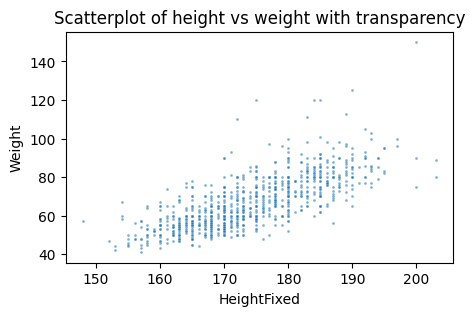

In [28]:
# plot with smaller points (s=4) and transparency (alpha=0.6)
axes = sns.scatterplot(data=adults, x='HeightFixed', y='Weight', s=4, alpha=0.6)
axes.figure.set_size_inches(5, 3)
axes.set_title('Scatterplot of height vs weight with transparency')
pass

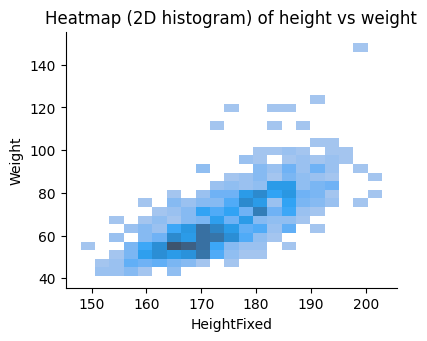

In [29]:
grid = sns.displot(data=adults, x='HeightFixed', y='Weight')
grid.figure.set_size_inches(4, 3)
grid.ax.set_title('Heatmap (2D histogram) of height vs weight')
pass

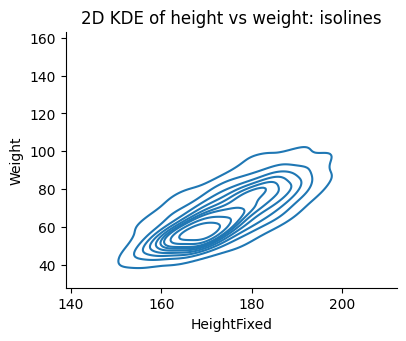

In [30]:
grid = sns.displot(data=adults, x='HeightFixed', y='Weight', kind="kde")
grid.figure.set_size_inches(4, 3)
grid.ax.set_title('2D KDE of height vs weight: isolines')
pass

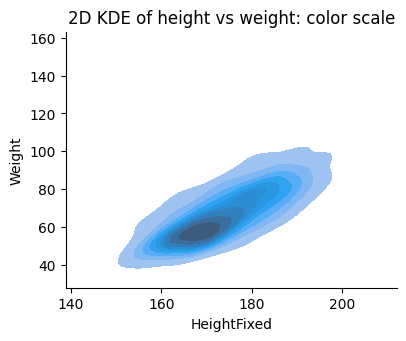

In [31]:
grid = sns.displot(data=adults, x='HeightFixed', y='Weight', kind="kde", fill=True)
grid.figure.set_size_inches(4, 3)
grid.ax.set_title('2D KDE of height vs weight: color scale')
pass

## Clustering multi-dimensional data 

* The FSEV survey contains questions about phobias and fears, each with answers 1-5 (5 means highest fear).
* We will first randomly select 200 participants without missing values.
* We will display them as a heatmap.


In [32]:
# columns 63-72 are fears, drop rows with missing values, sample 200 people
fsev_sample = fsev.iloc[:, 63:73].dropna().sample(200)
# show sample of the data
display(fsev_sample.head())

,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking
363,1.0,1.0,1.0,2.0,5.0,5,1.0,2.0,2.0,4.0
214,3.0,2.0,2.0,3.0,5.0,4,3.0,3.0,3.0,3.0
920,2.0,1.0,1.0,3.0,3.0,2,2.0,4.0,3.0,4.0
307,1.0,5.0,2.0,1.0,5.0,4,1.0,1.0,4.0,4.0
717,1.0,1.0,1.0,2.0,3.0,4,1.0,1.0,3.0,3.0


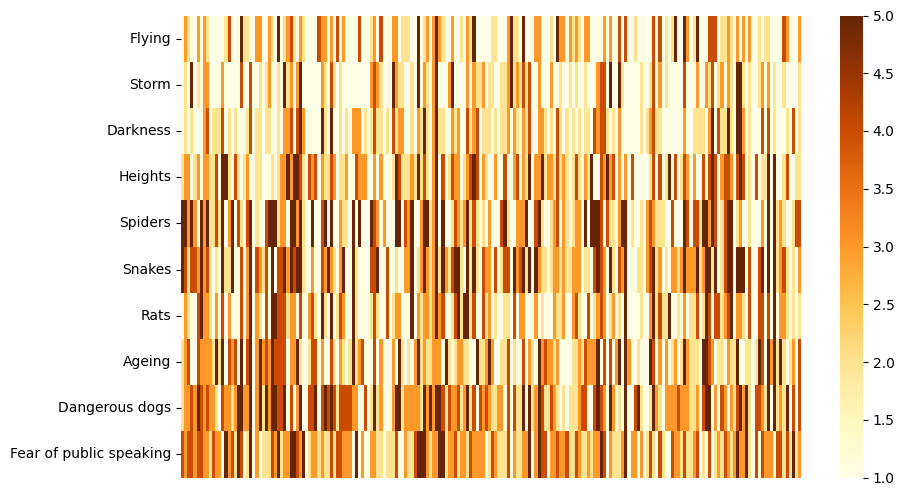

In [33]:
figure, axes = plt.subplots(figsize=(10,6))
sns.heatmap(fsev_sample.transpose(), xticklabels=False, ax=axes, cmap="YlOrBr")
pass

* Heatmap does not show clear trends, but we see that some phobias have higher values than others.
* We display this more explicitly by sorted means.
* Then we "standardize" values for individual phobias by subtracting the mean and dividing by the standard deviation.
* After this change, each phobia has mean 0 and standard deviation 1.
* People with positive scores fear that subject more than average, with negative scores less than average.

In [34]:
display(Markdown("**Phobias sorted by mean score in the survey:**"))
display(fsev_sample.mean().sort_values())

**Phobias sorted by mean score in the survey:**

Storm                      1.885
Flying                     1.980
Darkness                   2.025
Rats                       2.360
Heights                    2.480
Ageing                     2.555
Spiders                    2.715
Fear of public speaking    2.840
Snakes                     2.855
Dangerous dogs             3.015
dtype: float64

In [35]:
fsev_sample_standardized = (fsev_sample - fsev_sample.mean()) / fsev_sample.std()
display(fsev_sample_standardized.head())

,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking
363,-0.803647,-0.737764,-0.885108,-0.359928,1.452102,1.437979,-0.999987,-0.403015,-0.747457,0.979887
214,0.836449,0.095868,-0.021588,0.389922,1.452102,0.767592,0.470582,0.323138,-0.011046,0.135157
920,0.016401,-0.737764,-0.885108,0.389922,0.181116,-0.573180,-0.264702,1.049292,-0.011046,0.979887
307,-0.803647,2.596762,-0.021588,-1.109777,1.452102,0.767592,-0.999987,-1.129169,0.725365,0.979887
717,-0.803647,-0.737764,-0.885108,-0.359928,0.181116,0.767592,-0.999987,-1.129169,-0.011046,0.135157


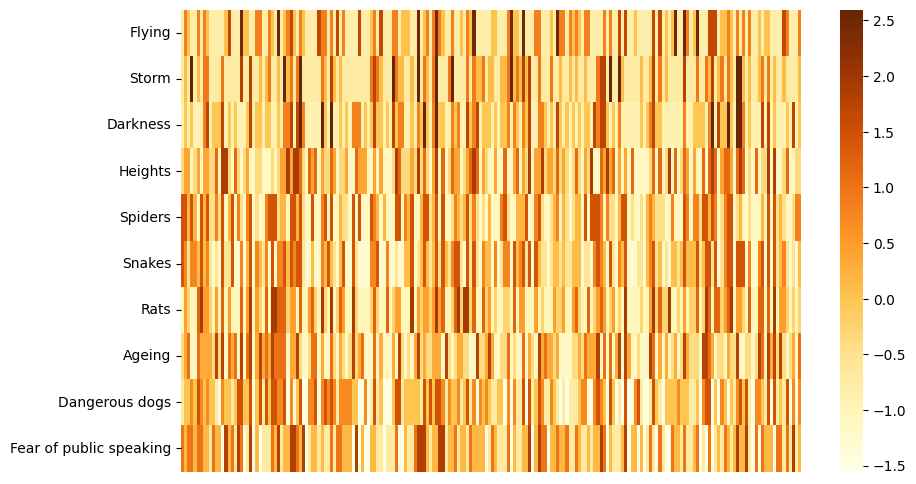

In [36]:
figure,axes = plt.subplots(figsize=(10,6))
sns.heatmap(fsev_sample_standardized.transpose(), xticklabels=False, cmap="YlOrBr")
pass

* Heatmap now does not show much.
* Bellow we reorder its rows and columns by [clustering](https://seaborn.pydata.org/generated/seaborn.clustermap.html) (zhlukovanie), which puts similar rows and similar columns together.
* The degree of similarity is reflected also in the trees (recall last lecture about hierarchies).
* Some areas of dark and light colors now appear.


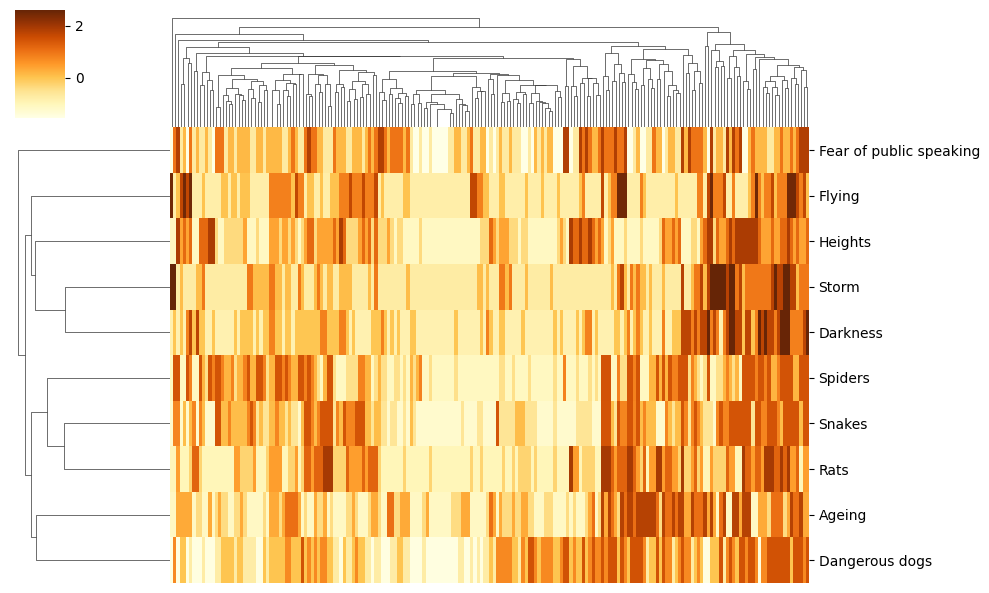

In [37]:
sns.clustermap(fsev_sample_standardized.transpose(), 
               xticklabels=False, figsize=(10,6), cmap="YlOrBr")
pass

## Dimensionality reduction

Methods for dimensionality reduction project high-dimensional data into lower-dimensional (usually 2D) space, while trying to preserve some structure in the original data.

* [**Principal component analysis**](https://scikit-learn.org/stable/modules/decomposition.html) (PCA) uses a linear projection: each new dimension is a linear combination (weighted sum) of the original dimensions. Weights are chosen to maximize variance.

Some methods do not use linear projections, but try to preserve distances between points, for example:
* [Multidimensional scaling](https://scikit-learn.org/stable/modules/manifold.html) (MDS),
* [T-distributed Stochastic Neighbor Embedding](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) (t-SNE).

We will use PCA from the [scikit-learn library](https://scikit-learn.org/stable/index.html) for machine learning in Python.


**PCA transformed values** (first five lines):

array([[-0.37918129, -1.05787296],
       [ 1.37937901, -0.2818021 ],
       [-0.2685224 , -0.45707943],
       [ 0.9147904 ,  0.06866801],
       [-1.18098851, -0.60787696]])

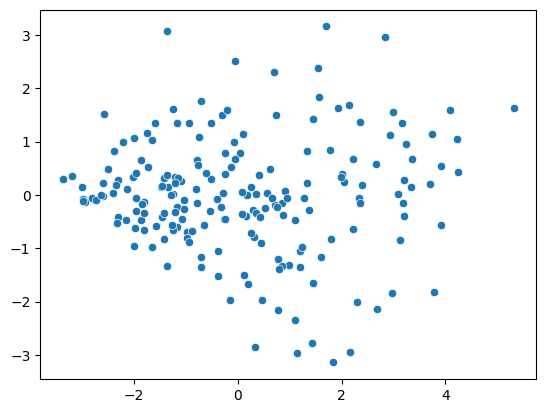

In [38]:
from sklearn.decomposition import PCA
# compute PCA of our standardized data with 2 dimensions
fsev_pca = PCA(n_components=2).fit_transform(fsev_sample_standardized)
display(Markdown("**PCA transformed values** (first five lines):"))
display(fsev_pca[0:5, :])
axes = sns.scatterplot(x=fsev_pca[:, 0], y=fsev_pca[:, 1])

The scatterplot starts to be interesting if we can color points by some known factors.

* Below we see that men and women are quite mixed but women are shifted to the left.
* It seems that the first dimension strongly correlates with the overall fearfuless of a person.
* Fears of snakes and storms are strongly related to the overall fearfulness, but they also have trends along the y-axis.

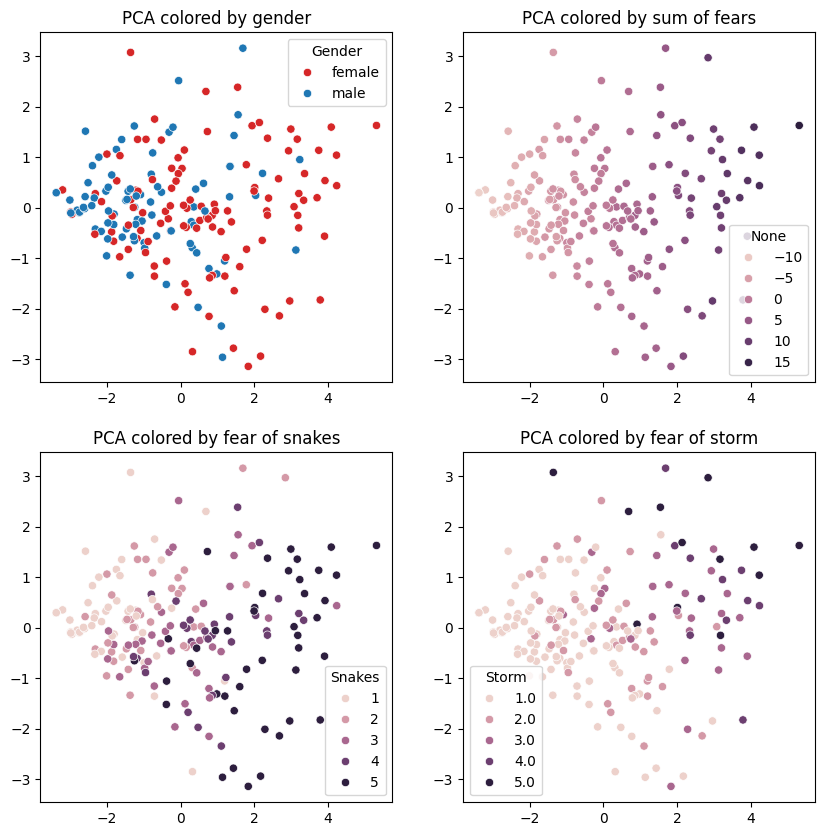

In [39]:
# all columns for our sample to select gender and all data
fsev_sample_all = fsev.loc[fsev_sample.index,]
figure, axes = plt.subplots(2, 2, figsize=(10,10))
sns.scatterplot(x=fsev_pca[:, 0], y=fsev_pca[:, 1], 
                hue=fsev_sample_all['Gender'], 
                hue_order=['female', 'male'], palette=['C3', 'C0'],
                ax=axes[0,0])
axes[0,0].set_title('PCA colored by gender')
sns.scatterplot(x=fsev_pca[:, 0], y=fsev_pca[:, 1], 
                hue=fsev_sample_standardized.sum(axis=1), ax=axes[0,1])
axes[0,1].set_title('PCA colored by sum of fears')
sns.scatterplot(x=fsev_pca[:, 0], y=fsev_pca[:, 1], 
                hue=fsev_sample_all['Snakes'], ax=axes[1,0])
axes[1,0].set_title('PCA colored by fear of snakes')
sns.scatterplot(x=fsev_pca[:, 0], y=fsev_pca[:, 1], 
                hue=fsev_sample_all['Storm'], ax=axes[1,1])
axes[1,1].set_title('PCA colored by fear of storm')
pass

## Conclusion and other courses

We briefly covered several statistical concepts often used in visualization:

* histogram,
* kernel density estimation,
* empirical cumulative distribution function,
* clustering,
* dimensionality reduction.

You will learn more in the next years of your study:

* [Fundamentals of Probability and Statistics](https://sluzby.fmph.uniba.sk/infolist/sk/1-DAV-201_20.html), 2W (DAV) or 3W (BIN)
* [Principles of Data Science](https://sluzby.fmph.uniba.sk/infolist/sk/1-DAV-302_20.html) 3W (DAV)
* [Linear Algebra](https://sluzby.fmph.uniba.sk/infolist/sk/1-DAV-104_20.html) this semester